### Data Gathering

In [1]:
#listing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

import re
from emot.emo_unicode import UNICODE_EMOJI
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
from PIL import Image

import textblob
from textblob import TextBlob

import string
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Dupe\Downloads\DataDNA Dataset Challenge - March 2023\IPhoneReviews.csv")

In [3]:
df.head()

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI


In [4]:
rdf = df[['review_text']].copy()

In [5]:
rdf.review_text=rdf.review_text.astype(str)

### Data preprocessing

In [6]:
eng_stop_words = list(stopwords.words('english'))

In [7]:
emoji = list(UNICODE_EMOJI.keys())

In [8]:
# function for preprocessing review_texts in preparation for sentiment analysis
def Refinedtexts(text):
    #changing tweet text to small letters
    text = text.lower()
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    filtered_words = [w for w in filtered_words if w not in emoji]
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text

In [9]:
# Generate a new column called 'refined_texts' by applying refinedtexts function to the 'review_text' column.
rdf['refined_text'] = rdf['review_text'].apply(Refinedtexts)

In [10]:
# Function for polarity score
def polarity(review_text):
    return TextBlob(review_text).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [11]:
# using the functions to get the polarity and sentiment
rdf['Polarity'] = rdf['review_text'].apply(polarity)
rdf['Sentiment'] = rdf['Polarity'].apply(sentimenttextblob)
sent = rdf['Sentiment'].value_counts()
sent

Positive    3902
Neutral      771
Negative     337
Name: Sentiment, dtype: int64

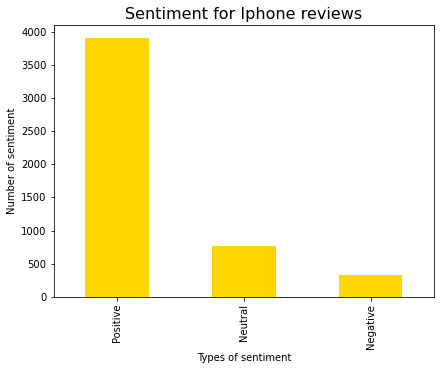

In [14]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['gold'], figsize=(15,5))
plt.title('Sentiment for Iphone reviews', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

In [12]:
rdf.head()

,review_text,refined_text,Polarity,Sentiment
0,NOTE:,note,0.000000,Neutral
1,Very bad experience with this iPhone xr phone....,bad experience iphone xr phone back camera fou...,-0.152000,Negative
2,Amazing phone with amazing camera coming from ...,amazing phone amazing camera coming iphone plu...,0.666667,Positive
3,So I got the iPhone XR just today. The product...,got iphone xr today product look amazing unfor...,-0.033902,Negative
4,I've been an android user all my life until I ...,ive android user life decided try iphone xr io...,0.493750,Positive


In [13]:
#another data wrangling process
# convert the refined text into a string separate with " "
reviews = rdf['refined_text'].tolist()
reviews = " ".join(reviews)

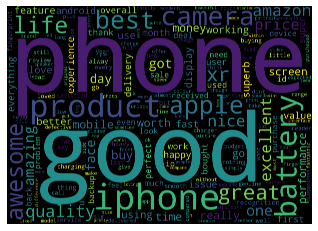

In [15]:
# Displaying the most talked about word in a word cloud 
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'black', 
                    width = 7000, height = 5000).generate(reviews)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
#saving the word cloud image
w_cloud.to_file("wordcloud.png")

In [146]:
#saving the file for further used in power bi
rdf.to_csv('sentiment.csv')